Importando métodos necessários

In [98]:
import pandas as pd
import numpy as np
import statistics
from scipy.stats import mannwhitneyu
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Importando Classificadores

In [99]:
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier, export_graphviz # Árvore de decisão
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.svm import SVC # SVM
from sklearn.neural_network import MLPClassifier # MLP

Importando a base de dados

In [100]:
#Importa a base
df = pd.read_csv("Vertebral.csv")
#cria um dataframe somente com a coluna das classes
df_class = pd.DataFrame(df,columns=['Class'])
##cria um dataframe sem a coluna das classes
df_temp = pd.DataFrame(df,columns=df.columns[:-1])


In [101]:
df.head()

,A1,A2,A3,A4,A5,A6,Class
0,0.916917,-0.092150,0.530972,1.193210,0.075683,0.156835,1
1,-0.717037,0.255166,-0.661397,-1.065923,0.110390,-0.542255,1
2,0.863030,2.535417,-1.373191,-0.766786,-0.786488,-0.632201,1
3,-1.879634,-0.593594,-1.016161,-1.881891,-0.413380,-0.440434,1
4,-0.873743,-0.682270,-1.121570,-0.581824,-1.510616,-0.590939,1


<AxesSubplot:>

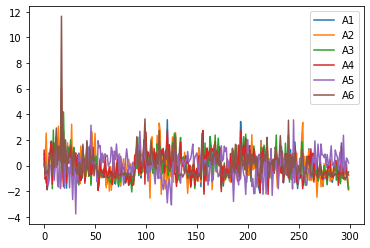

In [102]:
#Exibe o data frame dos atributos
df_temp.plot()

<AxesSubplot:>

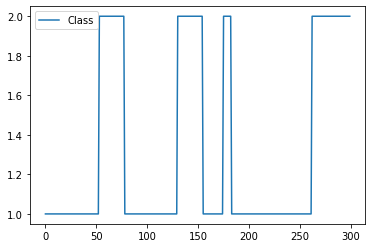

In [103]:
#Exibe o data frame das classes
df_class.plot()

Definição dos conjuntos de treino, teste e validação

In [104]:
#divide o dataframe em treino(50%) teste(25%) e validacao(25%)
x_treino, x_resto, y_treino, y_resto = train_test_split(df_temp,df['Class'],test_size=0.5, stratify=df['Class'], shuffle=True)
x_validacao, x_teste, y_validacao, y_teste = train_test_split(x_resto, y_resto, test_size=0.5, stratify=y_resto, shuffle=True)

Informações dos conjuntos

In [105]:
print("Dataframe 100%")
print(df.shape)

print("Treino 50%")
print(x_treino.shape)

print("Teste 25%")
print(x_teste.shape)

print("Validação 25%")
print(x_validacao.shape)



Dataframe 100%
(300, 7)
Treino 50%
(150, 6)
Teste 25%
(75, 6)
Validação 25%
(75, 6)


Obtendo os melhores parâmetros para os classificadores

KNN não ponderado

In [106]:
#KNN não ponderado
print('KNN não ponderado')
# array para salvar acurária para cada k
acuracia_knn_nao_ponderado = []

for i in range (20):
  knn = KNeighborsClassifier(n_neighbors=i+1, weights='uniform')
  knn.fit(x_treino, y_treino)
  pred = knn.predict(x_validacao)
  
  # Grava a acuracia com o k = i na posicao i+1
  acuracia_knn_nao_ponderado.append(accuracy_score(y_validacao, pred))

k_naoponderado = np.argmax(acuracia_knn_nao_ponderado)+1  
print("Melhor K = ", k_naoponderado) 
print("Acuracia com o melhor K =", acuracia_knn_nao_ponderado[k_naoponderado-1]*100,'%')
print(*acuracia_knn_nao_ponderado, sep=" | ")
print("")



KNN não ponderado
Melhor K =  16
Acuracia com o melhor K = 89.33333333333333 %
0.7466666666666667 | 0.76 | 0.8266666666666667 | 0.8266666666666667 | 0.8533333333333334 | 0.84 | 0.8266666666666667 | 0.84 | 0.8666666666666667 | 0.8666666666666667 | 0.8666666666666667 | 0.8533333333333334 | 0.88 | 0.8666666666666667 | 0.88 | 0.8933333333333333 | 0.8933333333333333 | 0.88 | 0.88 | 0.88



KNN Ponderado pelo inverso da distância euclidiana

In [107]:
#KNN Ponderado pelo inverso da distância euclidiana
print('KNN Ponderado pelo inverso da distância euclidiana')
# Inicializa um array vazio onde sera gravado a acuracia
acuracia_knn_ponderado = []

for i in range (20):
  knn = KNeighborsClassifier(n_neighbors=i+1, metric='euclidean', weights='distance')
  knn.fit(x_treino, y_treino)
  pred = knn.predict(x_validacao)
  
  # Grava a acuracia com o k = i na posicao i+1
  acuracia_knn_ponderado.append(accuracy_score(y_validacao, pred))

k_ponderado = np.argmax(acuracia_knn_ponderado)+1  
print("Melhor K = ", k_ponderado)
print("Acuracia com o melhor K = ", acuracia_knn_ponderado[k_ponderado-1]*100,'%')
print(*acuracia_knn_ponderado,sep=" | ")
print("")


KNN Ponderado pelo inverso da distância euclidiana
Melhor K =  10
Acuracia com o melhor K =  88.0 %
0.7466666666666667 | 0.7466666666666667 | 0.8266666666666667 | 0.8266666666666667 | 0.84 | 0.8533333333333334 | 0.84 | 0.8266666666666667 | 0.8666666666666667 | 0.88 | 0.8666666666666667 | 0.88 | 0.88 | 0.88 | 0.88 | 0.88 | 0.88 | 0.88 | 0.88 | 0.88



Árvore de decisão sem poda

In [108]:
# Árvore sem poda

# Inicializa a árvore com profundidade máxima
tree = DecisionTreeClassifier()
tree.fit(x_treino,y_treino)
pred = tree.predict(x_validacao)
print("Profundidade = ",tree.get_depth(),"\nNós = ",tree.tree_.node_count)
acuracia_sempoda = accuracy_score(y_validacao,pred)
print("Acurácia da árvore sem poda = ",acuracia_sempoda*100,'%')


Profundidade =  8 
Nós =  37
Acurácia da árvore sem poda =  82.66666666666667 %


Árvore de decisão com poda

In [109]:

#Árvore com poda
# Inicializa um array para a acurácia
acuracia_compoda = []

# Grava a acurácia de todas as profundidades possíveis para a árvore
for i in range (1, tree.get_depth()):
  tree = DecisionTreeClassifier(max_depth = i)
  tree.fit(x_treino, y_treino) 
  pred = tree.predict(x_validacao)
  acuracia_compoda.append(accuracy_score(y_validacao, pred))
  #Printa quantos nós a árvore possui
  print("Profundidade = ",i,"Nós = ", tree.tree_.node_count)

# Salva os melhores parâmetros para teste
melhor_poda = np.argmax(acuracia_compoda)+1 
print(*acuracia_compoda, sep=' | ')
print("Melhor profundidade = ", melhor_poda) 
print("Acuracia com a melhor profundidade =", acuracia_compoda[melhor_poda-1]*100,'%')
print("")


Profundidade =  1 Nós =  3
Profundidade =  2 Nós =  7
Profundidade =  3 Nós =  13
Profundidade =  4 Nós =  19
Profundidade =  5 Nós =  27
Profundidade =  6 Nós =  31
Profundidade =  7 Nós =  35
0.7866666666666666 | 0.7866666666666666 | 0.8 | 0.84 | 0.8266666666666667 | 0.8133333333333334 | 0.8133333333333334
Melhor profundidade =  4
Acuracia com a melhor profundidade = 84.0 %



SVM Polinomial

In [110]:
#SVM Polinomial
print('SVM Polinomial')
# Inicializa um array para acuracia
acuracia_svm_polinomial = []

# Testa 20 valores de erro(C) para o kernel polinomial
for i in range(20):
  svm_poli = SVC(C=i+1, kernel='poly')
  svm_poli.fit(x_treino, y_treino)
  pred = svm_poli.predict(x_validacao)
  # Grava a taxa de erro com o c = i na posicao i+1
  acuracia_svm_polinomial.append(accuracy_score(y_validacao, pred))

# Salva os melhores parâmetros para teste
melhor_polinomial = (np.argmax(acuracia_svm_polinomial)+1)
print(*acuracia_svm_polinomial, sep = ' | ') 
print("Melhor C = ", melhor_polinomial) 
print("Acuracia com o melhor C =", acuracia_svm_polinomial[melhor_polinomial-1]*100,'%')

SVM Polinomial
0.6666666666666666 | 0.6666666666666666 | 0.6666666666666666 | 0.6666666666666666 | 0.68 | 0.68 | 0.6933333333333334 | 0.72 | 0.72 | 0.72 | 0.7466666666666667 | 0.7466666666666667 | 0.7333333333333333 | 0.7466666666666667 | 0.7466666666666667 | 0.7466666666666667 | 0.7466666666666667 | 0.76 | 0.76 | 0.76
Melhor C =  18
Acuracia com o melhor C = 76.0 %


SVM Radial

In [111]:
#SVM Radial
print('SVM Radial')
# Inicializa um array para acuracia
acuracia_svm_radial = []

# Testa 20 valores de erro(C) para o kernel radial
for i in range(20):
  svm_rbf = SVC(C=i+1, kernel='rbf')
  svm_rbf.fit(x_treino, y_treino)
  pred = svm_rbf.predict(x_validacao)
  # Grava a taxa de erro com o c = i na posicao i+1
  acuracia_svm_radial.append(accuracy_score(y_validacao, pred))

# Salva os melhores parâmetros para teste
melhor_radial = (np.argmax(acuracia_svm_radial)+1)
print(*acuracia_svm_radial, sep = ' | ') 
print("Melhor C = ", melhor_radial)
print("Acuracia com o melhor C =", acuracia_svm_radial[melhor_radial-1]*100,'%')

SVM Radial
0.88 | 0.8933333333333333 | 0.9066666666666666 | 0.88 | 0.8666666666666667 | 0.88 | 0.8933333333333333 | 0.8933333333333333 | 0.8933333333333333 | 0.8933333333333333 | 0.8933333333333333 | 0.8933333333333333 | 0.8933333333333333 | 0.8933333333333333 | 0.8933333333333333 | 0.8933333333333333 | 0.8933333333333333 | 0.88 | 0.8666666666666667 | 0.8666666666666667
Melhor C =  3
Acuracia com o melhor C = 90.66666666666666 %


MLP - Multi Layered Perceptron

In [112]:
print("MLP")
# Inicializa um array para acuracia
acuracia_mlp = []

# Varia as épocas de treino de 100 em 100 até 10000
# Varia camadas escondidades de 50 em 50 até 5000
# Varia as taxas de aprnedizagem de 0.0 ate 1.0
# Testa todos com todos
for i in range (10):
    for j in range (5):
        for k in range (5):
            mlp = MLPClassifier(max_iter=((k+1)*200) , hidden_layer_sizes=((j+1)*100), learning_rate_init=((i+1)/10) )
            mlp.fit(x_treino, y_treino)
            pred = mlp.predict(x_validacao)
            acuracia_mlp.append(accuracy_score(y_validacao, pred))
melhor_mlp = np.argmax(acuracia_mlp)+1
print("Acurácias: ",*acuracia_mlp, sep=' | ')

# Salva os melhores parâmetros para teste
melhor_epoca_treino = (melhor_mlp%5)*200 
melhor_camada_escondida = (melhor_mlp%5)*100
melhor_taxa_de_aprendizagem = (melhor_mlp%10)/10

print("Melhor época de treino = ", melhor_epoca_treino)
print("Melhor camada escondida = ",melhor_camada_escondida)
print("Melhor taxa deaprendizagem = ",melhor_taxa_de_aprendizagem)
print("Acuracia com os melhores parametros = ", acuracia_mlp[melhor_mlp-1]*100,'%')

MLP


/home/vinicius/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinicius/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinicius/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácias:  | 0.84 | 0.8 | 0.8266666666666667 | 0.84 | 0.84 | 0.8 | 0.8133333333333334 | 0.8266666666666667 | 0.84 | 0.8266666666666667 | 0.84 | 0.8266666666666667 | 0.8266666666666667 | 0.8266666666666667 | 0.8 | 0.8 | 0.8133333333333334 | 0.84 | 0.8266666666666667 | 0.8266666666666667 | 0.8133333333333334 | 0.8266666666666667 | 0.84 | 0.84 | 0.84 | 0.8133333333333334 | 0.8 | 0.7866666666666666 | 0.8266666666666667 | 0.8 | 0.84 | 0.8266666666666667 | 0.8533333333333334 | 0.8 | 0.8133333333333334 | 0.84 | 0.8266666666666667 | 0.7866666666666666 | 0.84 | 0.8533333333333334 | 0.8666666666666667 | 0.8266666666666667 | 0.84 | 0.84 | 0.84 | 0.8666666666666667 | 0.8266666666666667 | 0.8533333333333334 | 0.84 | 0.8133333333333334 | 0.8133333333333334 | 0.8 | 0.84 | 0.84 | 0.8 | 0.8266666666666667 | 0.8533333333333334 | 0.8533333333333334 | 0.8266666666666667 | 0.8 | 0.8133333333333334 | 0.8533333333333334 | 0.84 | 0.8666666666666667 | 0.8133333333333334 | 0.8533333333333334 | 0.81333333333333

Testando todos os classificadores sobre o conjunto de teste

In [113]:
acuracia_melhor_knn=[]
acuracia_melhor_arvore = []
acuracia_melhor_svm = []
acuracia_melhor_mlp = []
acuracia_naive_bayes = []

#Arrays para gravar as probabilidades de cada instância do conjunto de teste para o sistema de múltiplos classificadores
proba_knn = []
proba_arvore = [] 
proba_svm = []
proba_mlp = []
proba_nb = []

for i in range(20):
    #Define um conjunto novo de treino para cada repetição para adicionar aleatoriadade e robustez ao processo
    #O conjunto de teste mantém-se o mesmo
    x_treino, x_resto, y_treino, y_resto = train_test_split(df_temp,df['Class'],test_size=0.5, stratify=df['Class'], shuffle=True)
    
    #Treina cada classificador com os melhores parâmentros obtidos anteriormente e executa sobre o conjunto de teste

    #KNN
    if acuracia_knn_nao_ponderado[k_naoponderado-1] >= acuracia_knn_ponderado[k_ponderado-1]:
        knn = KNeighborsClassifier(n_neighbors=k_naoponderado, weights='uniform')
    else:
        knn = KNeighborsClassifier(n_neighbors=k_ponderado, metric='euclidean', weights='distance')
    knn.fit(x_treino, y_treino)
    pred = knn.predict(x_teste)  
    acuracia_melhor_knn.append(accuracy_score(y_teste, pred))
    proba_knn.append(knn.predict_proba(x_teste))
 
    #Árvore de decisão
    if (acuracia_sempoda >= acuracia_compoda[melhor_poda-1]):
        tree = DecisionTreeClassifier()
    else:
        tree = DecisionTreeClassifier(max_depth = melhor_poda)
    tree.fit(x_treino, y_treino) 
    pred = tree.predict(x_teste)
    acuracia_melhor_arvore.append(accuracy_score(y_teste, pred))
    proba_arvore.append(tree.predict_proba(x_teste)) 

    #SVM
    if(acuracia_svm_polinomial[melhor_polinomial-1]>=acuracia_svm_radial[melhor_radial-1]):
        svm = SVC(C=melhor_polinomial, kernel='poly',probability=True)
    else:
        svm = SVC(C=melhor_radial, kernel='rbf',probability=True)
    svm.fit(x_treino, y_treino)
    pred = svm.predict(x_teste)
    acuracia_melhor_svm.append(accuracy_score(y_teste, pred))
    proba_svm.append(svm.predict_proba(x_teste))

    #MLP
    mlp = MLPClassifier(max_iter=int(melhor_epoca_treino) , hidden_layer_sizes=int(melhor_camada_escondida), learning_rate_init=float(melhor_taxa_de_aprendizagem))
    mlp.fit(x_treino, y_treino)
    pred = mlp.predict(x_teste)
    acuracia_melhor_mlp.append(accuracy_score(y_teste, pred))
    proba_mlp.append(svm.predict_proba(x_teste))

    #NaiveBayes
    nb = GaussianNB()
    nb.fit(x_treino, y_treino)
    pred = nb.predict(x_teste)
    acuracia_naive_bayes.append(accuracy_score(y_teste, pred))
    proba_nb.append(nb.predict_proba(x_teste))


In [114]:
#printa todas as acurácias
print("\nAcurácias KNN:")
print(*acuracia_melhor_knn, sep=' | ')
print("Maior acurácia = ",acuracia_melhor_knn[np.argmax(acuracia_melhor_knn)])

print("\nAcurácias Árvore de Decisão:")
print(*acuracia_melhor_arvore, sep=' | ')
print("Maior acurácia = ",acuracia_melhor_arvore[np.argmax(acuracia_melhor_arvore)])

print("\nAcurácias SVM:")
print(*acuracia_melhor_svm, sep=' | ')
print("Maior acurácia = ",acuracia_melhor_svm[np.argmax(acuracia_melhor_svm)])

print("\nAcurácias MLP:")
print(*acuracia_melhor_mlp, sep=' | ')
print("Maior acurácia = ",acuracia_melhor_mlp[np.argmax(acuracia_melhor_mlp)])

print("\nAcurácias Naive Bayes:")
print(*acuracia_naive_bayes, sep=' | ')
print("Maior acurácia = ",acuracia_naive_bayes[np.argmax(acuracia_naive_bayes)])    


Acurácias KNN:
0.8133333333333334 | 0.8133333333333334 | 0.8133333333333334 | 0.7866666666666666 | 0.8133333333333334 | 0.8133333333333334 | 0.8266666666666667 | 0.7733333333333333 | 0.8266666666666667 | 0.7466666666666667 | 0.8266666666666667 | 0.84 | 0.8133333333333334 | 0.8133333333333334 | 0.7866666666666666 | 0.8133333333333334 | 0.8266666666666667 | 0.8 | 0.8266666666666667 | 0.8
Maior acurácia =  0.84

Acurácias Árvore de Decisão:
0.8666666666666667 | 0.8666666666666667 | 0.8666666666666667 | 0.8133333333333334 | 0.9066666666666666 | 0.9066666666666666 | 0.92 | 0.88 | 0.9333333333333333 | 0.88 | 0.9066666666666666 | 0.9066666666666666 | 0.88 | 0.8666666666666667 | 0.7866666666666666 | 0.9066666666666666 | 0.8933333333333333 | 0.9066666666666666 | 0.9066666666666666 | 0.8933333333333333
Maior acurácia =  0.9333333333333333

Acurácias SVM:
0.8533333333333334 | 0.88 | 0.84 | 0.8666666666666667 | 0.8533333333333334 | 0.8533333333333334 | 0.8533333333333334 | 0.84 | 0.89333333333333

Testes Estatísticos

In [115]:
#Calcula a média e o desvio padrão para as 20 repetições de cada classificador

#KNN
media_knn = statistics.mean(acuracia_melhor_knn)
desviop_knn = statistics.pstdev(acuracia_melhor_knn)
print("\nKNN\nMedia = ",media_knn,"\nDesvio padrão = ",desviop_knn)

#arvore de decisão
media_arvore = statistics.mean(acuracia_melhor_arvore)
desviop_arvore = statistics.pstdev(acuracia_melhor_arvore)
print("\nÁrvore de Decisão\nMedia = ",media_arvore,"\nDesvio padrão = ",desviop_arvore)

#SVM
media_svm = statistics.mean(acuracia_melhor_svm)
desviop_svm = statistics.pstdev(acuracia_melhor_svm)
print("\nSVM\nMedia = ",media_svm,"\nDesvio padrão = ",desviop_svm)

#MLP
media_mlp = statistics.mean(acuracia_melhor_mlp)
desviop_mlp = statistics.pstdev(acuracia_melhor_mlp)
print("\nMLP\nMedia = ",media_mlp,"\nDesvio padrão = ",desviop_mlp)

#Naive Bayes
media_nb = statistics.mean(acuracia_naive_bayes)
desviop_nb = statistics.pstdev(acuracia_naive_bayes)
print("\nNaive Bayes\nMedia = ",media_nb,"\nDesvio padrão = ",desviop_nb)
print('')



KNN
Media =  0.8086666666666666 
Desvio padrão =  0.02119748412744619

Árvore de Decisão
Media =  0.8846666666666667 
Desvio padrão =  0.03406529677610991

SVM
Media =  0.8586666666666667 
Desvio padrão =  0.018571184369578823

MLP
Media =  0.8766666666666667 
Desvio padrão =  0.041284917881042764

Naive Bayes
Media =  0.7913333333333333 
Desvio padrão =  0.007630348761506434



In [121]:
#Verifica se há diferença significativa entre o desempenho dos classificadores utilizando teste de mann whitney
#Realiza o teste em pares de classificadores

#Nível da significância da diferença = 1 ponto percentual
sig = 0.1
stat,p_value = mannwhitneyu(acuracia_melhor_knn,acuracia_melhor_arvore)
if p_value < sig:
    print("Hipótese nula rejeitada: Diferença significante entre os classificadores KNN e AD.")
else:
    print("\nHipótese nula aceita: Não há diferença significante entre os classificadores KNN e AD.")

stat,p_value = mannwhitneyu(acuracia_melhor_knn,acuracia_melhor_svm)
if p_value < sig:
    print("\nHipótese nula rejeitada: Diferença significante entre os classificadores KNN e SVM.") 
else:
    print("\nHipótese nula aceita: Não há diferença significante entre os classificadores KNN e SVM.")

stat,p_value = mannwhitneyu(acuracia_melhor_knn,acuracia_melhor_mlp)
if p_value < sig:
    print("\nHipótese nula rejeitada: Diferença significante entre os classificadores KNN e MLP.") 
else:
    print("\nHipótese nula aceita: Não há diferença significante entre os classificadores KNN e MLP.")   

stat,p_value = mannwhitneyu(acuracia_melhor_knn,acuracia_naive_bayes)
if p_value < sig:
    print("\nHipótese nula rejeitada: Diferença significante entre os classificadores KNN e Naive Bayes.") 
else:
    print("\nHipótese nula aceita: Não há diferença significante entre os classificadores KNN e Naive Bayes.")

stat,p_value = mannwhitneyu(acuracia_melhor_arvore,acuracia_melhor_svm)
if p_value < sig:
    print("\nHipótese nula rejeitada: Diferença significante entre os classificadores AD e SVM.") 
else:
    print("\nHipótese nula aceita: Não há diferença significante entre os classificadores AD e SVM.")

stat,p_value = mannwhitneyu(acuracia_melhor_arvore,acuracia_melhor_mlp)
if p_value < sig:
    print("\nHipótese nula rejeitada: Diferença significante entre os classificadores AD e MLP.") 
else:
    print("\nHipótese nula aceita: Não há diferença significante entre os classificadores AD e MLP.")

stat,p_value = mannwhitneyu(acuracia_melhor_arvore,acuracia_naive_bayes)
if p_value < sig:
    print("\nHipótese nula rejeitada: Diferença significante entre os classificadores AD e Naive Bayes.") 
else:
    print("\nHipótese nula aceita: Não há diferença significante entre os classificadores AD e Naive Bayes.")

stat,p_value = mannwhitneyu(acuracia_melhor_svm,acuracia_melhor_mlp)
if p_value < sig:
    print("\nHipótese nula rejeitada: Diferença significante entre os classificadores SVM e MLP.") 
else:
    print("\nHipótese nula aceita: Não há diferença significante entre os classificadores SVM e MLP.")

stat,p_value = mannwhitneyu(acuracia_melhor_svm,acuracia_naive_bayes)
if p_value < sig:
    print("\nHipótese nula rejeitada: Diferença significante entre os classificadores SVM e Naive Bayes.") 
else:
    print("\nHipótese nula aceita: Não há diferença significante entre os classificadores SVM e Naive Bayes.")

stat,p_value = mannwhitneyu(acuracia_melhor_mlp,acuracia_naive_bayes)
if p_value < sig:
    print("\nHipótese nula rejeitada: Diferença significante entre os classificadores MLP e Naive Bayes.") 
else:
    print("\nHipótese nula aceita: Não há diferença significante entre os classificadores MLP e Naive Bayes.")


Hipótese nula rejeitada: Diferença significante entre os classificadores KNN e AD.

Hipótese nula rejeitada: Diferença significante entre os classificadores KNN e SVM.

Hipótese nula rejeitada: Diferença significante entre os classificadores KNN e MLP.

Hipótese nula rejeitada: Diferença significante entre os classificadores KNN e Naive Bayes.

Hipótese nula rejeitada: Diferença significante entre os classificadores AD e SVM.

Hipótese nula aceita: Não há diferença significante entre os classificadores AD e MLP.

Hipótese nula rejeitada: Diferença significante entre os classificadores AD e Naive Bayes.

Hipótese nula rejeitada: Diferença significante entre os classificadores SVM e MLP.

Hipótese nula rejeitada: Diferença significante entre os classificadores SVM e Naive Bayes.

Hipótese nula rejeitada: Diferença significante entre os classificadores MLP e Naive Bayes.


In [117]:

#Compara o desempenho dos classificadores, utilizando a média aritética de 20 acurácias, para avaliar qual é o melhor
melhor_classificador = []
medias=[media_knn,media_arvore,media_svm,media_mlp,media_nb]
if(np.argmax(medias)==0):
    melhor_classificador = ['KNN',media_knn]
elif(np.argmax(medias)==1):
    melhor_classificador = ['Árvore de decisão',media_arvore]
elif(np.argmax(medias)==2):
    melhor_classificador = ['SVM',media_svm]
elif(np.argmax(medias)==3):
    melhor_classificador = ['MLP',media_mlp]
elif(np.argmax(medias)==4):
    melhor_classificador = ['Naive Bayes',media_nb]

print(melhor_classificador[0],"é o melhor classificador, com média de acurácia de",melhor_classificador[1]*100,'%')

Árvore de decisão é o melhor classificador, com média de acurácia de 88.46666666666667 %


Sistemas de Múltiplos Classificadores

Regra da Soma

In [118]:
acuracias_regra_soma=[]
for i in range(20):
    pred_soma = []
    sum1 = sum2 = 0
    for j in range(75):
        sum1 = proba_knn[i][j][0] + proba_arvore[i][j][0] + proba_svm[i][j][0] + proba_mlp[i][j][0] + proba_nb[i][j][0]
        sum2 = proba_knn[i][j][1] + proba_arvore[i][j][1] + proba_svm[i][j][1] + proba_mlp[i][j][1] + proba_nb[i][j][1]
        if sum1 >= sum2:
            pred_soma.append(1)
        else:
            pred_soma.append(2)
    
    acuracias_regra_soma.append(accuracy_score(y_teste,pred_soma))

print("Acurácias múltiplos classificadores com regra da soma:")
print(*acuracias_regra_soma, sep=' | ')
print("Maior acurácia = ",acuracias_regra_soma[np.argmax(acuracias_regra_soma)]*100,'%')
media_regra_soma = statistics.mean(acuracias_regra_soma)
print("Média das acurácias = ",media_regra_soma)
desviop_regra_soma = statistics.pstdev(acuracias_regra_soma)
print("Desvio padrão das acurácias = ",desviop_regra_soma)

Acurácias múltiplos classificadores com regra da soma:
0.8533333333333334 | 0.84 | 0.8666666666666667 | 0.84 | 0.88 | 0.8666666666666667 | 0.8666666666666667 | 0.84 | 0.8666666666666667 | 0.8266666666666667 | 0.8266666666666667 | 0.84 | 0.84 | 0.8666666666666667 | 0.8533333333333334 | 0.88 | 0.8666666666666667 | 0.92 | 0.88 | 0.88
Maior acurácia =  92.0 %
Média das acurácias =  0.86
Desvio padrão das acurácias =  0.022110831935702683


Regra do Produto

In [119]:
acuracias_regra_produto = []
for i in range(20):
    pred_produto = []
    prod1 = prod2 = 0
    for j in range(75):
        prod1 = proba_knn[i][j][0] * proba_arvore[i][j][0] * proba_svm[i][j][0] * proba_mlp[i][j][0] * proba_nb[i][j][0]
        prod2 = proba_knn[i][j][1] * proba_arvore[i][j][1] * proba_svm[i][j][1] * proba_mlp[i][j][1] * proba_nb[i][j][1]
        if prod1 >= prod2:
            pred_produto.append(1)
        else:
            pred_produto.append(2)
    acuracias_regra_produto.append(accuracy_score(y_teste,pred_produto))

print("Acurácias múltiplos classificadores com regra do produto:")
print(*acuracias_regra_produto, sep=' | ')
print("Maior acurácia = ",acuracias_regra_soma[np.argmax(acuracias_regra_produto)]*100,'%')
media_regra_produto = statistics.mean(acuracias_regra_produto)
print("Média das acurácias = ",media_regra_produto)
desviop_regra_produto = statistics.pstdev(acuracias_regra_produto)
print("Desvio padrão das acurácias = ",desviop_regra_produto)

Acurácias múltiplos classificadores com regra do produto:
0.84 | 0.84 | 0.88 | 0.84 | 0.9066666666666666 | 0.9066666666666666 | 0.8666666666666667 | 0.8666666666666667 | 0.8666666666666667 | 0.8266666666666667 | 0.88 | 0.84 | 0.8133333333333334 | 0.84 | 0.8533333333333334 | 0.8933333333333333 | 0.88 | 0.92 | 0.92 | 0.88
Maior acurácia =  92.0 %
Média das acurácias =  0.868
Desvio padrão das acurácias =  0.030375428666385384


Borda Count

In [120]:
acuracias_borda_count = []
for i in range(20):
    pred_borda_count = []
    for j in range(75):
        class1=class2=0
        if proba_knn[i][j][0]>=proba_knn[i][j][1]:
            class1+=2
            class2+=1
        else: 
            class2+=2
            class1+=1

        if proba_arvore[i][j][0]>=proba_arvore[i][j][1]:
            class1+=2
            class2+=1
        else: 
            class2+=2
            class1+=1

        if proba_svm[i][j][0]>=proba_svm[i][j][1]:
            class1+=2
            class2+=1
        else: 
            class2+=2
            class1+=1

        if proba_mlp[i][j][0]>=proba_mlp[i][j][1]:
            class1+=2
            class2+=1
        else: 
            class2+=2
            class1+=1
        if proba_nb[i][j][0]>=proba_nb[i][j][1]:
            class1+=2
            class2+=1
        else: 
            class2+=2
            class1+=1
        
        if class1 >= class2:
            pred_borda_count.append(1)
        else:
            pred_borda_count.append(2)

    acuracias_borda_count.append(accuracy_score(y_teste,pred_borda_count))

print("Acurácias múltiplos classificadores com borda count:")
print(*acuracias_borda_count, sep=' | ')
print("Maior acurácia = ",acuracias_regra_soma[np.argmax(acuracias_borda_count)]*100,'%')
media_borda_count = statistics.mean(acuracias_borda_count)
print("Média das acurácias = ",media_borda_count)
desviop_borda_count = statistics.pstdev(acuracias_borda_count)
print("Desvio padrão das acurácias = ",desviop_borda_count)


Acurácias múltiplos classificadores com borda count:
0.88 | 0.8533333333333334 | 0.8666666666666667 | 0.84 | 0.8533333333333334 | 0.84 | 0.8666666666666667 | 0.8266666666666667 | 0.8933333333333333 | 0.8533333333333334 | 0.8666666666666667 | 0.8533333333333334 | 0.8533333333333334 | 0.88 | 0.84 | 0.8666666666666667 | 0.88 | 0.8933333333333333 | 0.9066666666666666 | 0.8533333333333334
Maior acurácia =  88.0 %
Média das acurácias =  0.8633333333333334
Desvio padrão das acurácias =  0.020165977949672224
